In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# cargar los datos
df = pd.read_csv("../../datasets/unbalanced-1500.csv")

# separar las características (X) y la etiqueta (y)
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


In [17]:
# crear el modelo
model = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(343, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                11008     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
Total params: 11,587
Trainable params: 11,587
Non-trainable params: 0
_________________________________________________________________


In [18]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=1500, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/1500
29/29 [==============================] - 1s 11ms/step - loss: 0.7047 - accuracy: 0.6665 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 2/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.5092 - accuracy: 0.8192 - val_loss: 0.4344 - val_accuracy: 0.8242
Epoch 3/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.8308 - val_loss: 0.4043 - val_accuracy: 0.8330
Epoch 4/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.4126 - accuracy: 0.8462 - val_loss: 0.4150 - val_accuracy: 0.8374
Epoch 5/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8516 - val_loss: 0.3858 - val_accuracy: 0.8681
Epoch 6/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8676 - val_loss: 0.3878 - val_accuracy: 0.8725
Epoch 7/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.3842 - accuracy: 0.8775 - val_loss: 0.3762 - val_accuracy: 0.8703
Epoch

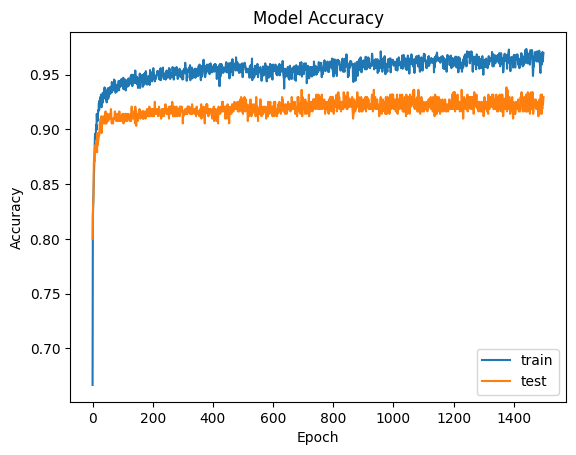

In [19]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# SAVE MODEL

In [23]:
# Save the model to a single file
model.save( './rna_unbalance.keras', save_format='keras_v3')

# Results

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


15/15 [==============================] - 0s 1ms/step
[[ 35   2   3]
 [  7  93  15]
 [  1   4 295]]


In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8140    0.8750    0.8434        40
           1     0.9394    0.8087    0.8692       115
           2     0.9425    0.9833    0.9625       300

    accuracy                         0.9297       455
   macro avg     0.8986    0.8890    0.8917       455
weighted avg     0.9304    0.9297    0.9284       455



In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9318681318681319


In [27]:
from sklearn.metrics import cohen_kappa_score, classification_report

print("Cohen's kappa: ", cohen_kappa_score(y_test, y_pred))

Cohen's kappa:  0.8586602535197154


In [28]:
print("size of the splits")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.size)
print("y_pred: ", y_pred.size)

size of the splits
X_train:  (1820, 343)
X_test:  (455, 343)
y_test:  455
y_pred:  455
